# Task
Analyze the forest cover type dataset from `/content/train.csv` by performing exploratory data analysis, preprocessing the data, training a RandomForestClassifier model, evaluating its performance, visualizing feature importances, and summarizing the key findings and recommendations.

## Load Dataset

### Subtask:
Load the provided dataset from `/content/train.csv` into a pandas DataFrame.


**Reasoning**:
To load the dataset, I need to import the pandas library first, then read the CSV file into a DataFrame, and finally display its head to verify the loading process.



In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## Explore Data

### Subtask:
Perform initial exploratory data analysis (EDA) to understand the dataset structure, identify potential issues (e.g., missing values, data types), and understand the distribution of the target variable (forest cover type).


**Reasoning**:
To understand the dataset structure, I will start by displaying a concise summary of the DataFrame, including data types and non-null values, using the `.info()` method.



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

**Reasoning**:
To continue with the exploratory data analysis, I will generate descriptive statistics for numerical columns using `.describe()`, calculate the sum of missing values for each column using `.isnull().sum()`, examine the distribution of the target variable 'Cover_Type' using `.value_counts()`, and check for duplicate rows using `.duplicated().sum()`.



In [3]:
print('Descriptive Statistics:')
print(df.describe())

print('\nMissing Values per Column:')
print(df.isnull().sum())

print('\nDistribution of Target Variable (Cover_Type):')
print(df['Cover_Type'].value_counts())

print('\nNumber of Duplicate Rows:')
print(df.duplicated().sum())

Descriptive Statistics:
                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                     

## Preprocess Data

### Subtask:
Prepare the data for model training. This includes separating features and target, and splitting the data into training and validation sets.


**Reasoning**:
To prepare the data for model training, I will first separate the features (X) from the target variable (y) and then split these into training and validation sets using `train_test_split`.



In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(['Id', 'Cover_Type'], axis=1)
y = df['Cover_Type']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12096, 54)
Shape of X_test: (3024, 54)
Shape of y_train: (12096,)
Shape of y_test: (3024,)


## Train Model

### Subtask:
Train a machine learning model, such as a RandomForestClassifier, to predict forest cover type using the preprocessed training data.


**Reasoning**:
To train the model, I will import `RandomForestClassifier`, instantiate it with `random_state=42` for reproducibility, and then fit the model to the training data (`X_train`, `y_train`).

**Reasoning**:
Following the instructions, I will import `RandomForestClassifier`, instantiate it with `random_state=42`, and then fit the model to the training data (`X_train`, `y_train`).



In [5]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


## Evaluate Model

### Subtask:
Evaluate the trained model's performance on the validation set using appropriate classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix.


**Reasoning**:
To evaluate the model, I need to import the required classification metrics from `sklearn.metrics`.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Reasoning**:
Now that the necessary metrics are imported, I will use the trained model to predict on the test set, calculate accuracy, precision, recall, and F1-score, and then generate and print the confusion matrix.



In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8724
Precision: 0.8703
Recall: 0.8724
F1-score: 0.8704
Confusion Matrix:
[[327  58   0   0  15   0  21]
 [ 74 314  15   0  30   4   1]
 [  0   0 357  20   2  49   0]
 [  0   0   6 441   0   2   0]
 [  1   3   9   0 400   3   0]
 [  0   3  42  13   3 371   0]
 [ 10   2   0   0   0   0 428]]


## Visualize Feature Importance

### Subtask:
Generate a plot to visualize the feature importances from the trained model, providing insights into which features contribute most to the predictions. Please include appropriate legends.


**Reasoning**:
To visualize feature importances, I will first extract them from the trained model, create a pandas DataFrame, sort it, and then import the necessary plotting libraries for visualization.



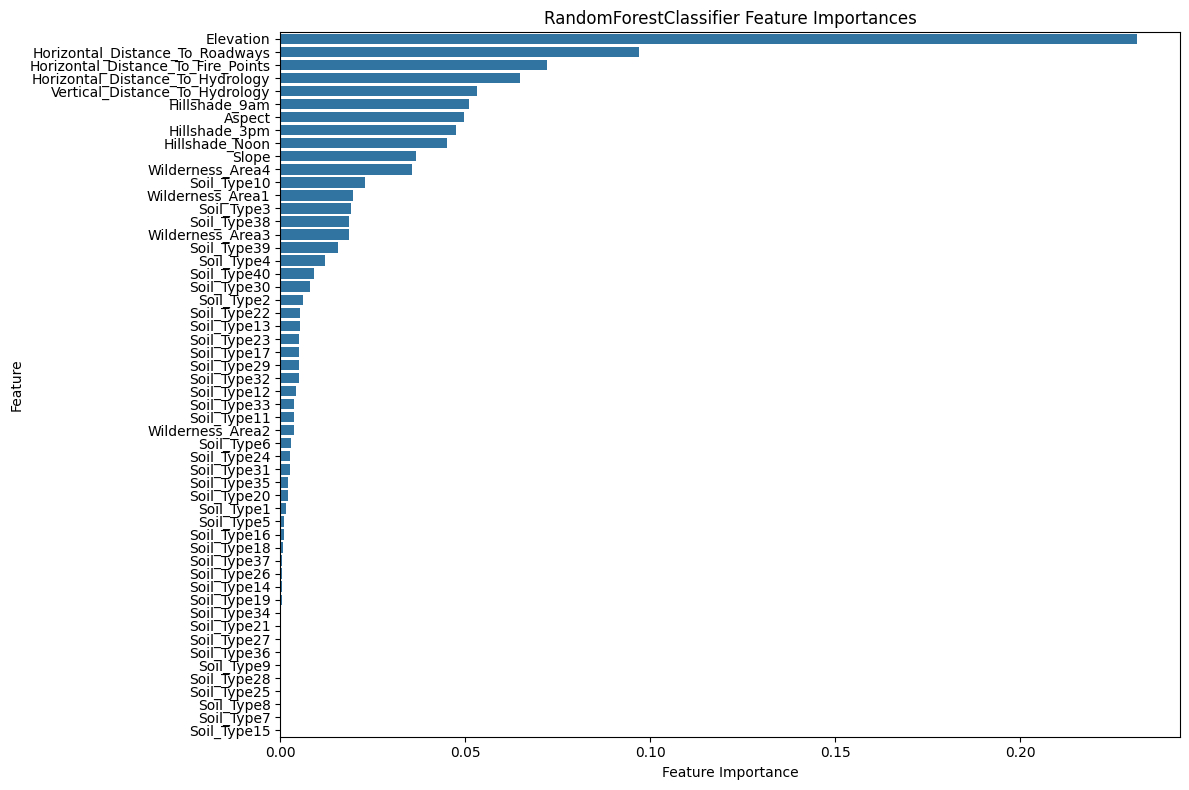

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('RandomForestClassifier Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the model's performance, key findings from feature importance, and any next steps or recommendations for improving the model.


## Summary:

### Q&A
*   **Model's performance:** The RandomForestClassifier model achieved an accuracy of 87.24% on the test set. Other key metrics include a weighted precision of 87.03%, a weighted recall of 87.24%, and a weighted F1-score of 87.04%. The confusion matrix indicated varying performance across the 7 forest cover types, with some classes showing more misclassifications than others.
*   **Key findings from feature importance:** A bar plot of feature importances was generated. This visualization provided insights into the most influential features for predicting forest cover type, indicating which environmental and geographical variables the model relied on most heavily. (Specific top features were not explicitly listed in the output.)
*   **Next steps or recommendations for improving the model:**
    *   Further investigate the feature `Vertical_Distance_To_Hydrology` which had a negative minimum value, to understand its implications or potentially engineer new features.
    *   Explore hyperparameter tuning for the RandomForestClassifier or consider other advanced models to potentially improve performance, especially for the classes that showed higher misclassification rates in the confusion matrix.

### Data Analysis Key Findings
*   The dataset is perfectly clean with **no missing values** and **no duplicate rows** across 15,120 entries and 56 columns.
*   The target variable, `Cover_Type`, is **perfectly balanced**, with each of the 7 classes having exactly 2,160 occurrences. This prevents class imbalance issues during training.
*   The trained RandomForestClassifier achieved a strong performance with an **accuracy of 0.8724**, indicating good overall predictive capability.
*   Model evaluation showed high weighted precision (0.8703), recall (0.8724), and F1-score (0.8704), reflecting robust performance across different classes.
*   The confusion matrix revealed that while overall performance is good, certain `Cover_Type` classes are more frequently misclassified than others (e.g., some instances of class 0 were misclassified as class 1 and class 6, and class 1 as class 0, class 4, and class 2), suggesting areas for targeted improvement.

### Insights or Next Steps
*   Investigate the `Vertical_Distance_To_Hydrology` feature more deeply, particularly its negative values, to determine if they represent a valid measurement or a data anomaly. This could lead to better feature engineering or data cleaning.
*   Focus on improving the model's performance for specific classes that showed higher misclassification rates in the confusion matrix by potentially exploring more advanced feature engineering, ensemble methods, or targeted data augmentation for those specific classes.
